# Travel Insurance Prediction Analysis

## Problem Statement
The goal of this analysis is to predict whether a customer will purchase travel insurance based on their demographic and travel-related information.

## Dataset Source
The dataset is sourced from Kaggle: [Travel Insurance Prediction Data](https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data).

## Objective
Build a predictive model and analyze key factors influencing the purchase decision.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import shap

In [2]:
# Load the dataset
#file_path = "TravelInsurancePrediction.csv"
df = pd.read_csv('TravelInsurancePrediction.csv')

In [3]:
# Initial inspection of the dataset
print("Dataset Shape:", df.shape)
print("Dataset Columns:", df.columns.tolist())
df.head()

Dataset Shape: (1987, 10)
Dataset Columns: ['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# Data Cleaning Section

In [4]:
# Dropping unnecessary columns
df_cleaned = df.drop(columns=["Unnamed: 0"])

# Encoding categorical columns
categorical_columns = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col, encoder in label_encoders.items():
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

# Checking the cleaned data
df_cleaned.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


# EDA Section

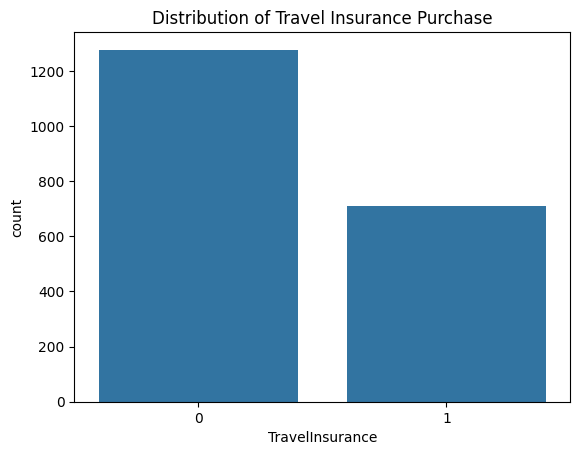

In [5]:
# Exploratory Data Analysis
# Distribution of target variable
sns.countplot(data=df_cleaned, x='TravelInsurance')
plt.title("Distribution of Travel Insurance Purchase")
plt.show()

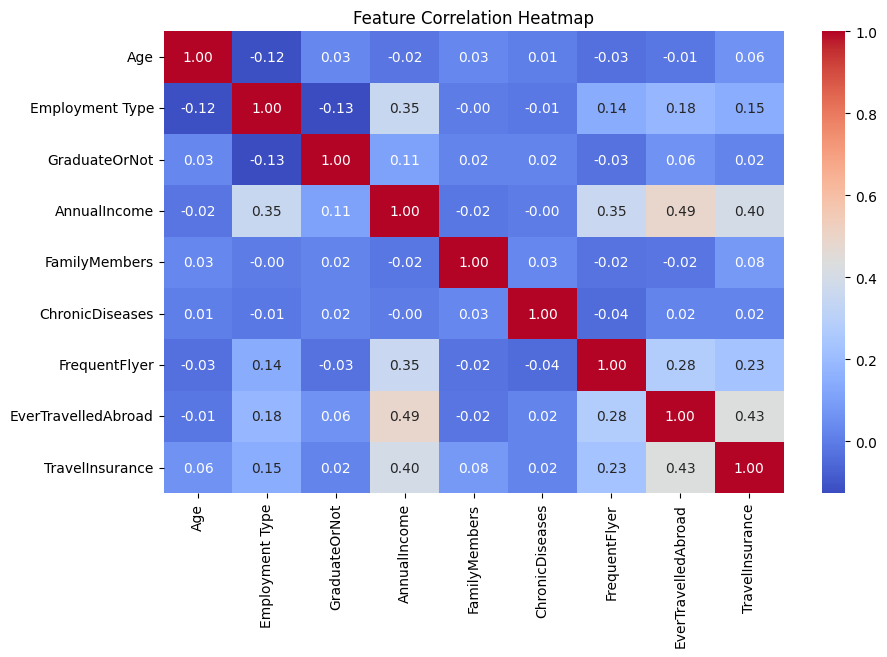

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Preprocessing Section

In [7]:
# Splitting the data into features and target
X = df_cleaned.drop(columns=['TravelInsurance'])
y = df_cleaned['TravelInsurance']

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling Section

In [10]:
# Training a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Predictions and Evaluation
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       375
           1       0.77      0.63      0.69       222

    accuracy                           0.79       597
   macro avg       0.79      0.76      0.77       597
weighted avg       0.79      0.79      0.79       597



In [12]:
# AUC-ROC Score
y_proba = clf.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.7816456456456456


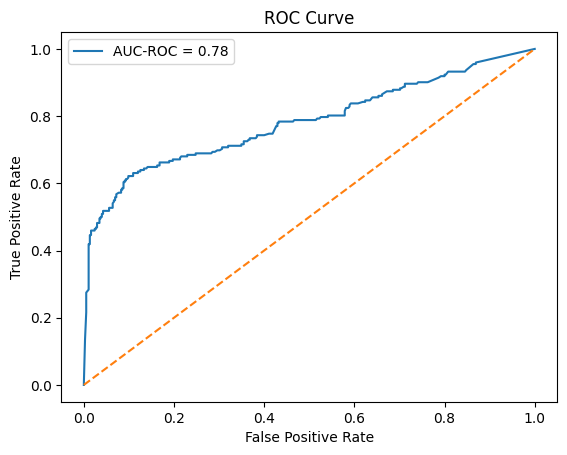

In [13]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC-ROC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature Importance Section

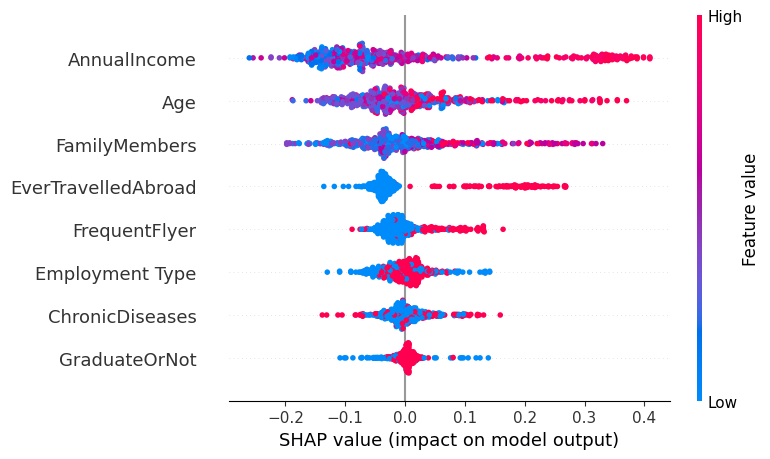

In [18]:
# Convert X_test_scaled back to a DataFrame with original feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# SHAP Feature Importance
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_scaled_df)

# Use the SHAP values and scaled data for plotting
shap.summary_plot(shap_values[:,:,1], X_test_scaled_df, plot_type="dot")

## Conclusion
The Random Forest Classifier provided good predictions for travel insurance purchase. 
Key insights include feature importance derived from SHAP analysis, highlighting the most influential factors.
Further recommendations can focus on refining features and testing additional models.